In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
# Runs that finished normally:
valid_runs = ["binarytrees.python", "binarytrees.python-2.python",
"binarytrees.python-21.python", "binarytrees.racket",
"binarytrees.racket-2.racket", "fannkuchredux.python-4.python",
"fannkuchredux.python-6.python", "fannkuchredux.racket",
"fannkuchredux.racket-2.racket", "fasta.python", "fasta.python-2.python",
"fasta.python-3.python", "fasta.python-21.python", "fasta.racket",
"fasta.racket-3.racket", "knucleotide.python-21.python",
"mandelbrot.racket", "mandelbrot.racket-2.racket",
"mandelbrot.racket-3.racket", "meteor.python", "meteor.python-2.python",
"meteor.python-3.python", "meteor.python-21.python",
"meteor.python-22.python", "meteor.python-23.python", "meteor.racket",
"meteor.python", "nbody.python", "nbody.python-2.python",
"nbody.python-21.python", "nbody.racket", "nbody.racket-2.racket",
"pidigits.python-2.python", "pidigits.python-21.python",
"pidigits.python-22.python", "pidigits.python-23.python",
"pidigits.python-24.python", "pidigits.racket",
"regexdna.python-5.python", "regexdna.python-25.python",
"revcomp.python-4.python", "revcomp.python-6.python",
"revcomp.python-23.python", "revcomp.python-24.python",
"revcomp.python-25.python", "revcomp.racket", "revcomp.racket-2.racket",
"spectralnorm.python-6.python", 
#"spectralnorm.python-22.python",
"spectralnorm.python-26.python", "spectralnorm.python-28.python",
"spectralnorm.racket", "spectralnorm.racket-2.racket",
"threadring.python-21.python"]

In [3]:
# Load all valid runs.
data_dir = "data/pin_out/"
ext = "pinout"
df = pd.DataFrame()
files = os.listdir( data_dir )
for run in valid_runs:
    if "{}.{}".format(run, ext) not in files:
        continue
    tmp_df = pd.read_csv( "{}/{}.{}".format(data_dir, run, ext) )
    tmp_df["run"] = run
    df = df.append( tmp_df, ignore_index=True )

In [4]:
df

,type,phase,num_bb,num_inst,num_phase_chg,num_phase_chg_phony,addr,call_fun_name,run
0,c,0,64957,71469725754,608842493,608774426,0,NaN,binarytrees.python
1,p,86,7321474119,36301499095,304356571,0,0,NaN,binarytrees.python
2,p,122,3117495995,15008870369,16113,0,0,NaN,binarytrees.python
3,p,120,3279994271,13988001721,617,0,0,NaN,binarytrees.python
4,p,83,99029608,965538678,49514804,0,140684118016269,empty,binarytrees.python
5,p,83,99029608,965538678,49514804,0,140684118015496,empty,binarytrees.python
6,p,83,99029608,965538678,49514804,0,140684118007199,empty,binarytrees.python
7,p,83,99029608,965538678,49514804,0,140684118017069,empty,binarytrees.python
8,p,83,99029608,965538678,49514804,0,140684118007985,empty,binarytrees.python
9,p,83,99029608,965538678,49514804,0,140684118006469,empty,binarytrees.python


In [33]:
def plot_fun_call_hist( run = "binarytrees.python" ):
    run_df = df[ df.run == run ]
    run_df_c = run_df[ df.type == "c" ].iloc[0]
    num_inst = run_df_c.num_inst
    call_df = run_df[ ( ( run_df.phase == 83 ) | ( run_df.phase == 98 ) ) & ( run_df.call_fun_name != "empty" ) ]

    call_df[ "num_inst_ratio" ] = call_df.num_inst * 100.0 / num_inst

    call_df = call_df.groupby( "call_fun_name" ).sum().sort_values( by="num_inst", ascending=False )

    if call_df.empty:
        print "run {} is empty, not plotting".format( run )
        return
    ax = call_df.plot( kind="bar", y="num_inst_ratio", title=run )
    ax.set_ylabel( "percent of all instructions" )

/Users/berkin/work/venvs/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/berkin/work/venvs/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


run binarytrees.python-2.python is empty, not plotting
run binarytrees.racket is empty, not plotting
run binarytrees.racket-2.racket is empty, not plotting
run fannkuchredux.racket is empty, not plotting
run fannkuchredux.racket-2.racket is empty, not plotting
run nbody.racket is empty, not plotting
run nbody.racket-2.racket is empty, not plotting
run spectralnorm.python-28.python is empty, not plotting
run spectralnorm.racket is empty, not plotting
run spectralnorm.racket-2.racket is empty, not plotting
run threadring.python-21.python is empty, not plotting


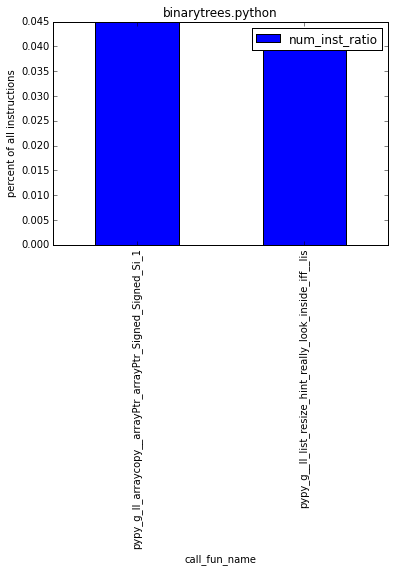

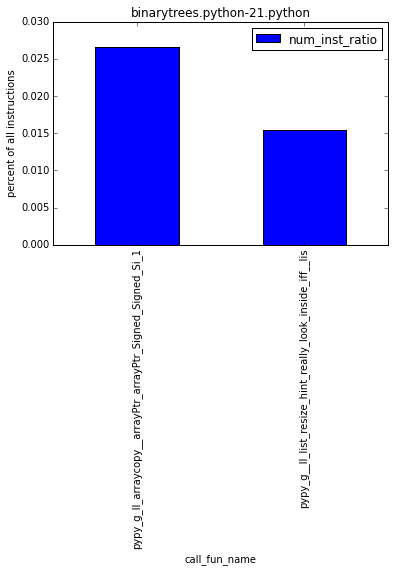

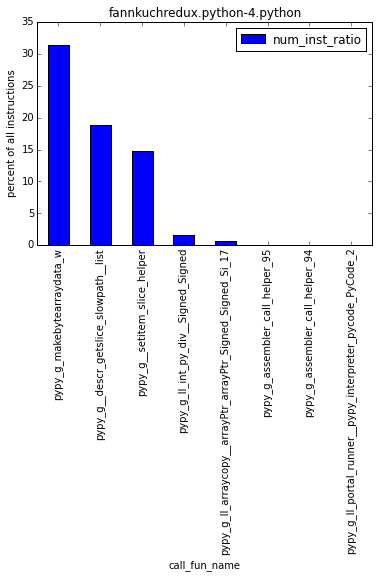

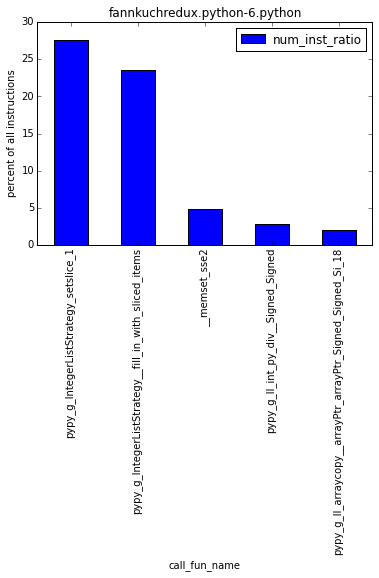

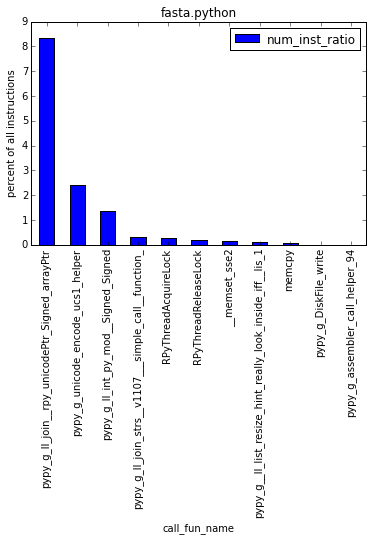

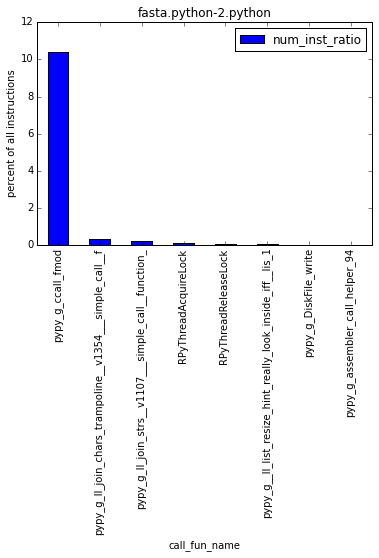

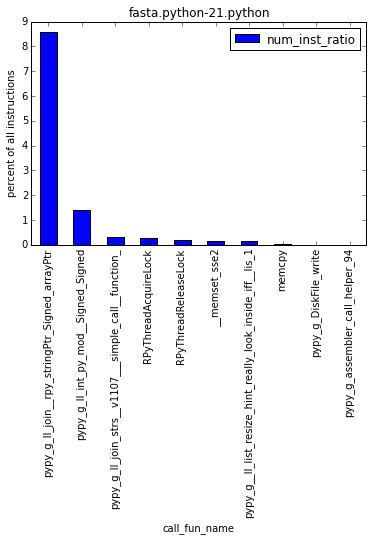

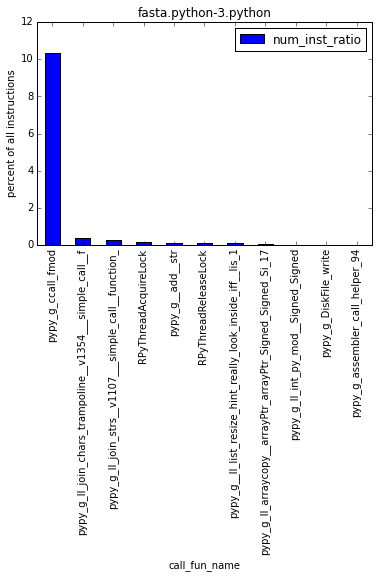

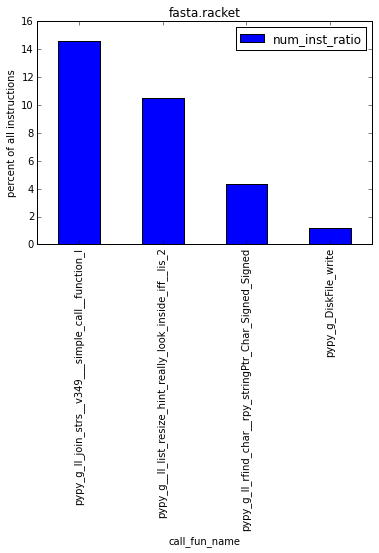

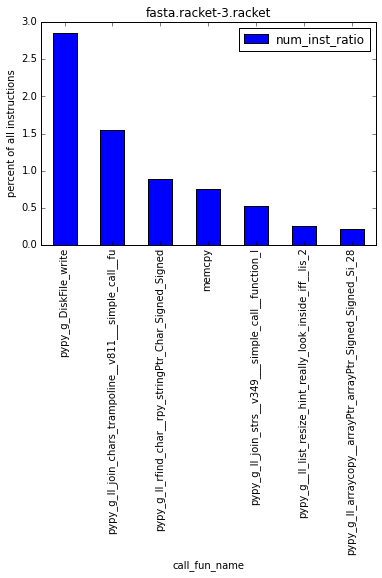

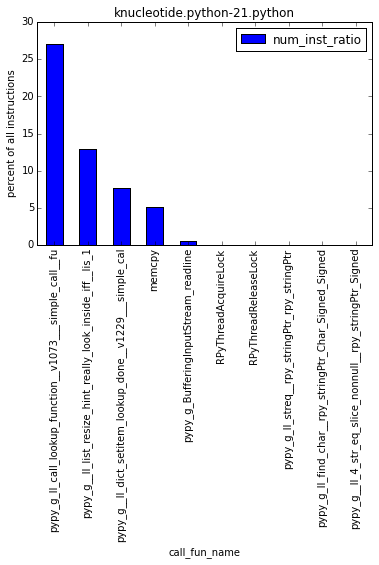

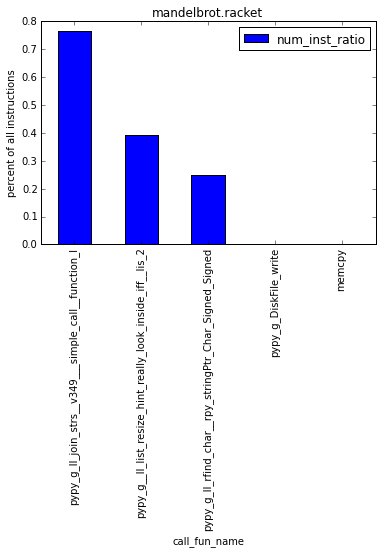

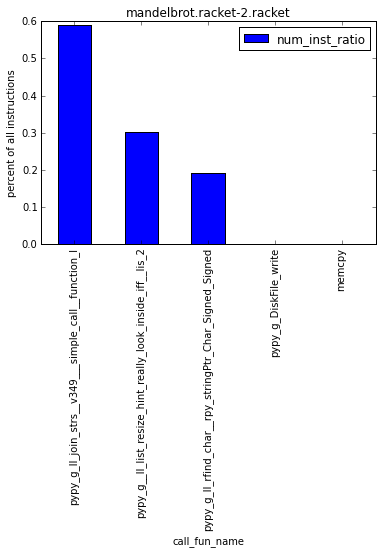

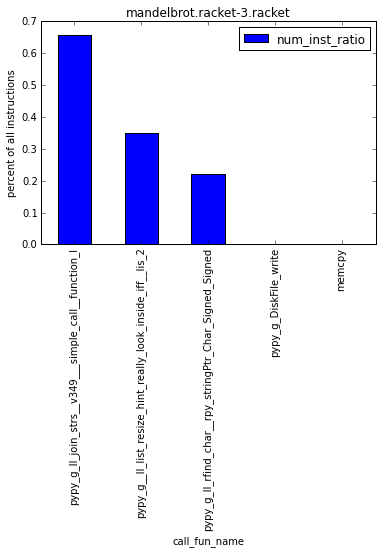

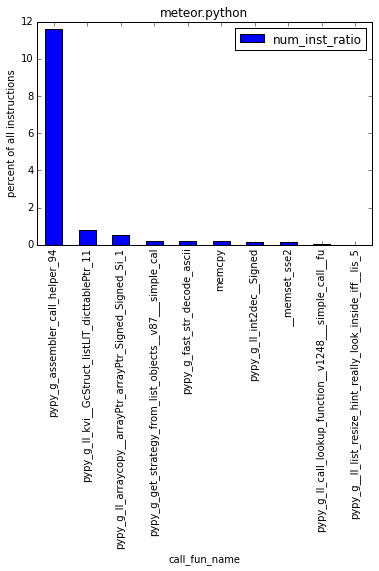

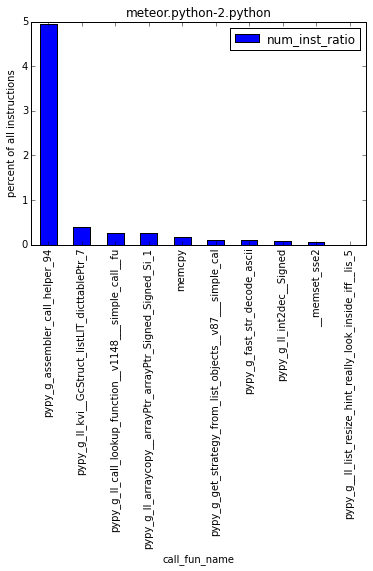

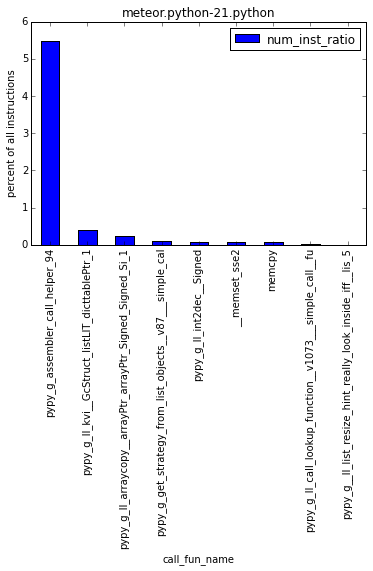

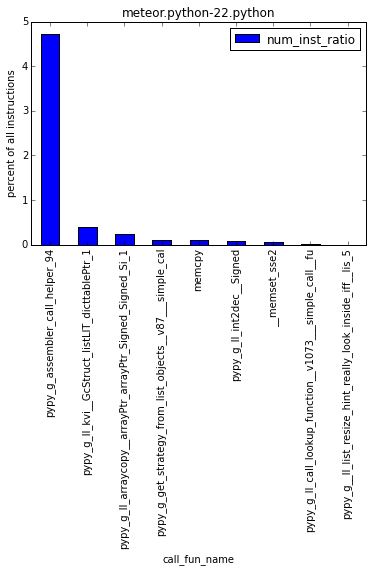

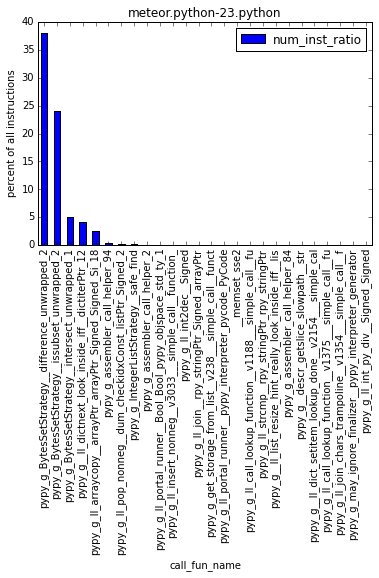

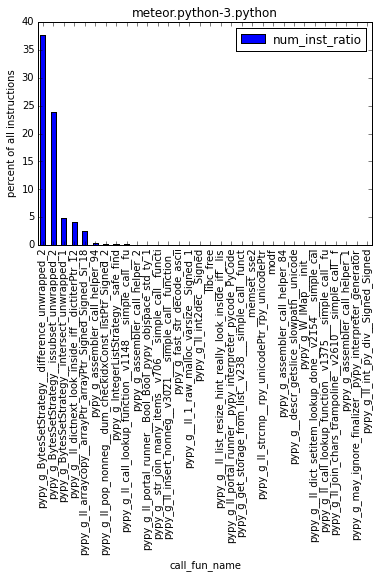

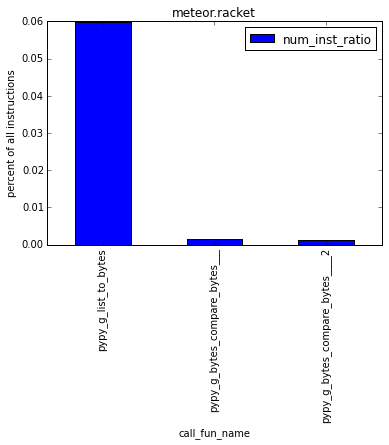

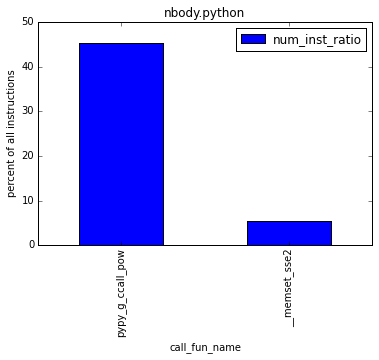

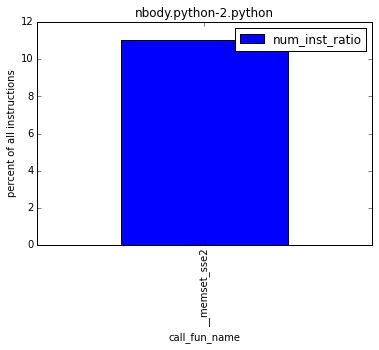

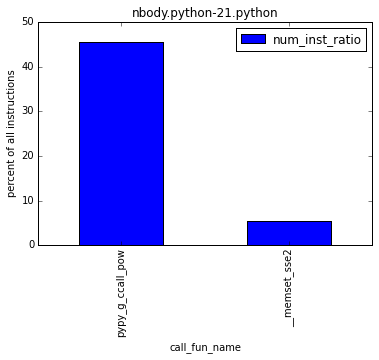

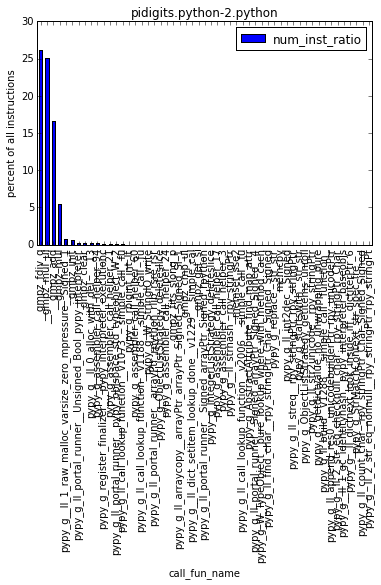

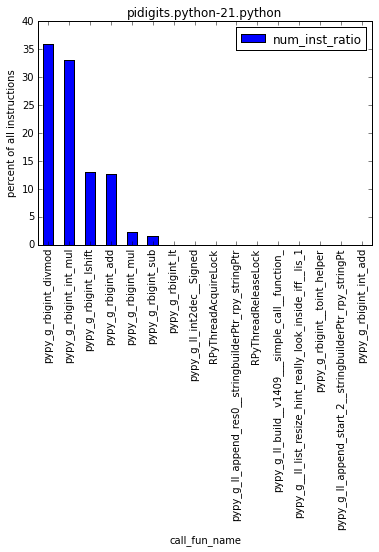

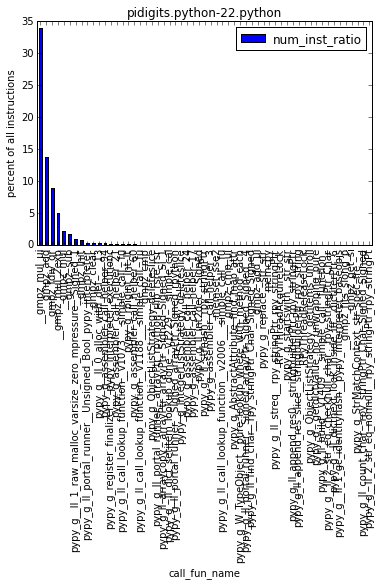

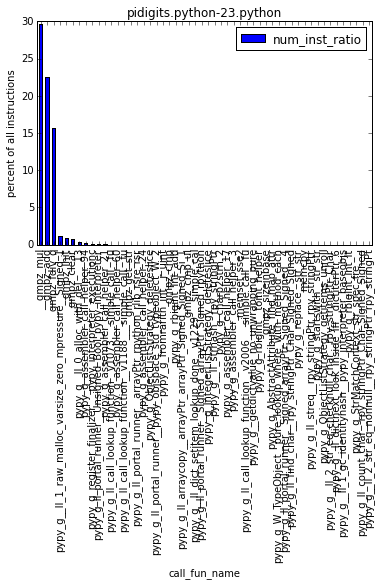

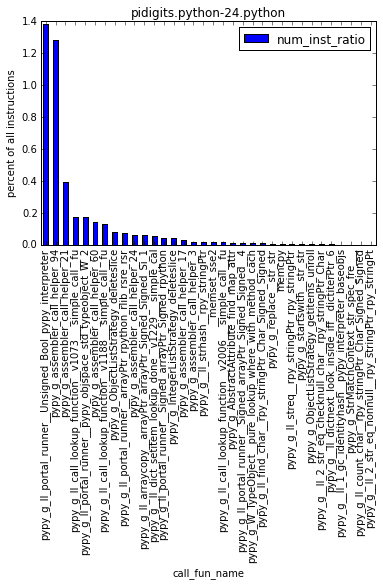

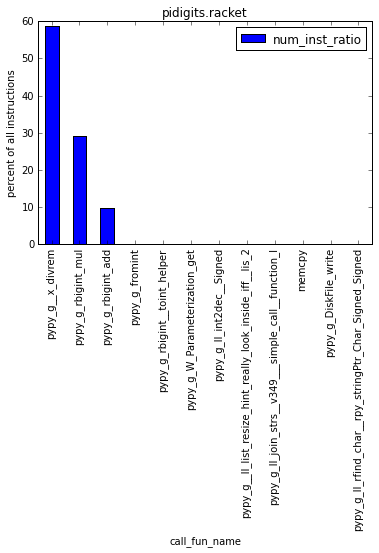

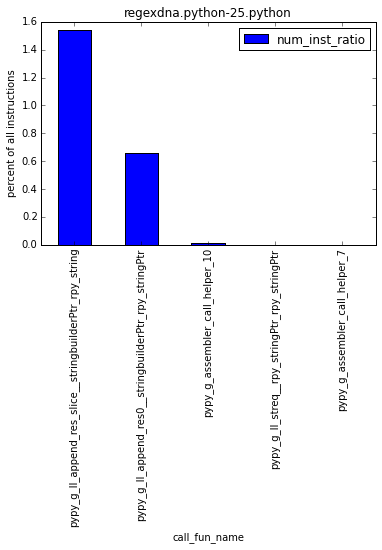

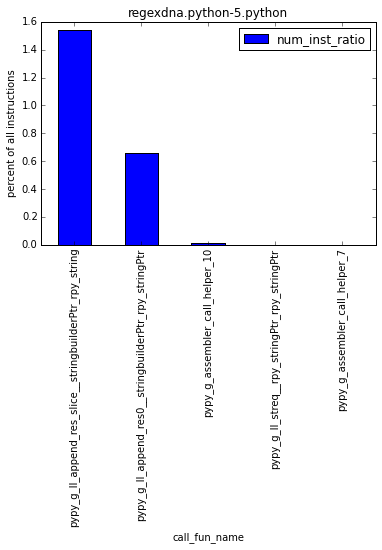

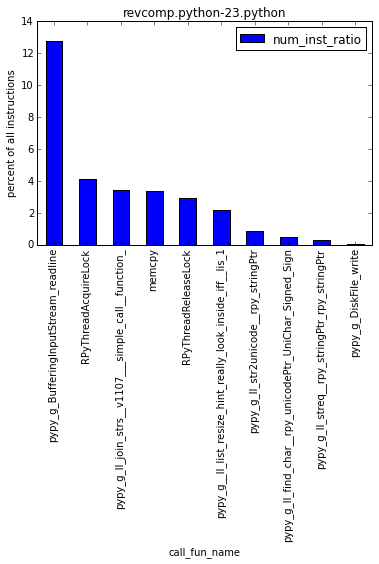

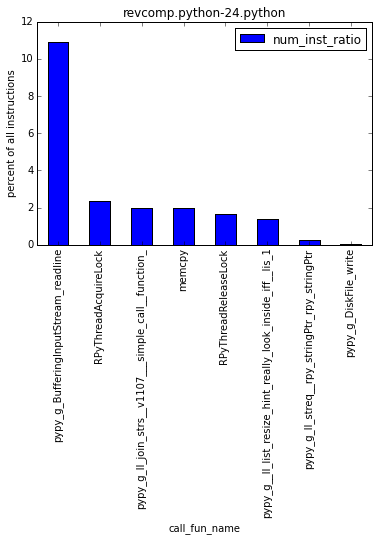

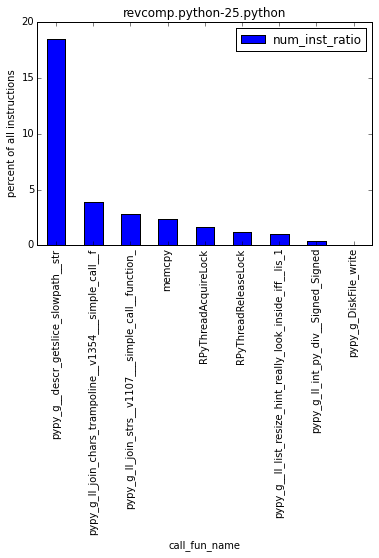

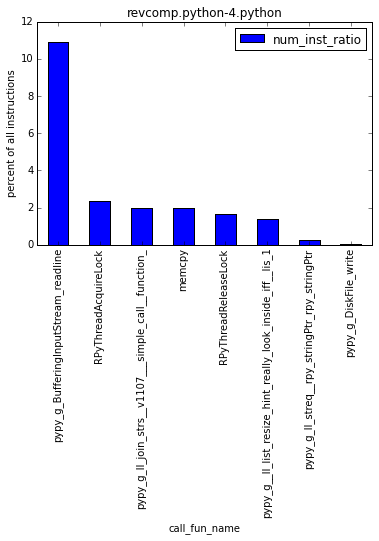

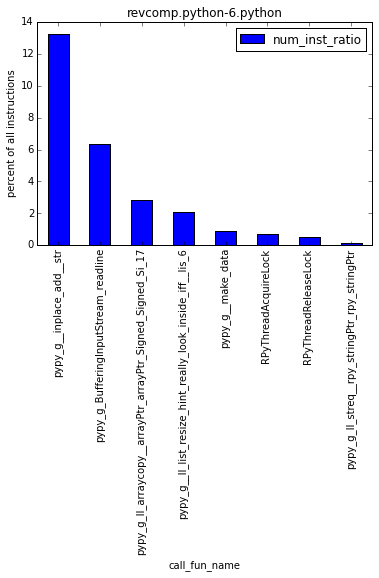

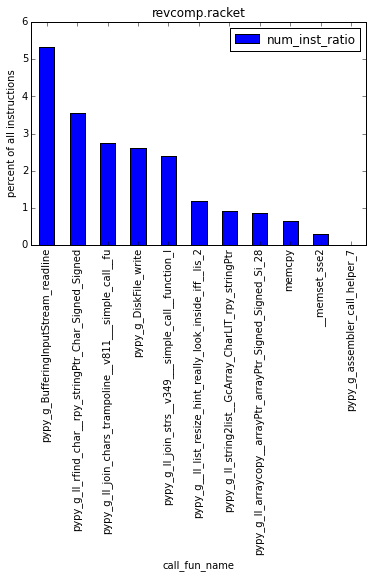

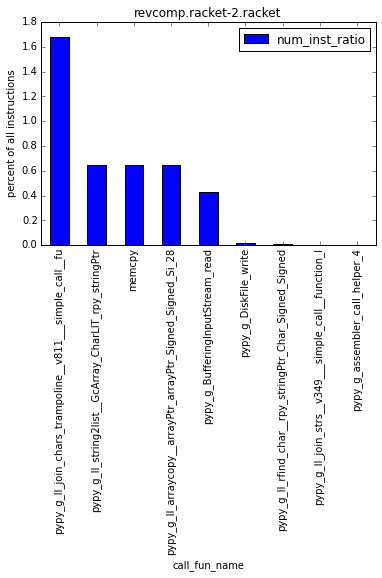

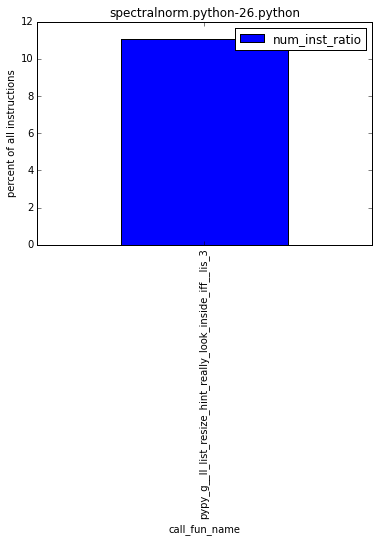

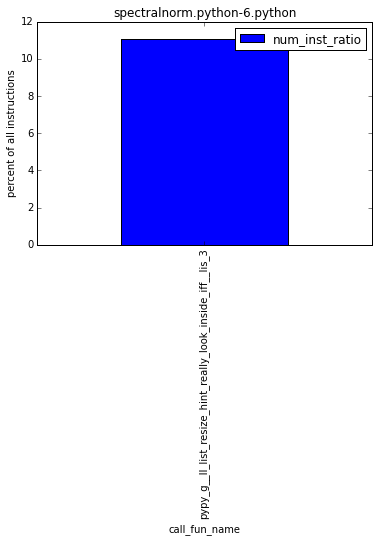

In [34]:
runs = df.groupby("run").first().index
for run in runs:
    plot_fun_call_hist( run )

In [65]:
#run = "binarytrees.python"
run_df = df[ df.type == "p" ]
# XXX: look into this.... meteor is 2X total execution for some reason
run_df = df[ df.run != "meteor.python" ]

In [48]:
run_df

,type,phase,num_bb,num_inst,num_phase_chg,num_phase_chg_phony,addr,call_fun_name,run
1,p,86,7321474119,36301499095,304356571,0,0,NaN,binarytrees.python
2,p,122,3117495995,15008870369,16113,0,0,NaN,binarytrees.python
3,p,120,3279994271,13988001721,617,0,0,NaN,binarytrees.python
4,p,83,99029608,965538678,49514804,0,140684118016269,empty,binarytrees.python
5,p,83,99029608,965538678,49514804,0,140684118015496,empty,binarytrees.python
6,p,83,99029608,965538678,49514804,0,140684118007199,empty,binarytrees.python
7,p,83,99029608,965538678,49514804,0,140684118017069,empty,binarytrees.python
8,p,83,99029608,965538678,49514804,0,140684118007985,empty,binarytrees.python
9,p,83,99029608,965538678,49514804,0,140684118006469,empty,binarytrees.python
10,p,83,5585932,54462837,2792966,0,140684118027005,empty,binarytrees.python


In [66]:
phases = {
    110: "b",
    120: "G",
    122: "g",
    130: "t",
    132: "T",
    160: "j",
    86:  "j",
    0:   "i",
    10:  "i",
    90:  "C",
    92:  "C",
    94:  "C",
    96:  "C",
    100: "C",
    102: "C",
    104: "C",
    106: "C",
}

def categorize( r ):
    phase = r.phase
    if phase in phases:
        return phases[ phase ]
    if phase == 83 or phase == 98:
        if r.call_fun_name == "empty":
            return "j"
        else:
            return "c"
    assert False, "unknown phase {}".format( phase )

run_df["_category"] = run_df.apply( categorize, axis=1 )

category_labels = {
    "i": "0: interpreter",
    "t": "1: tracing",
    "T": "1: tracing",
    "b": "2: blackhole",
    "g": "3: GC",
    "G": "3: GC",
    "j": "4: JIT",
    "c": "5: JIT call",
    "C": "5: JIT call"
}
run_df["category"] = run_df.apply( lambda r : category_labels[ r._category ], axis=1 )

/Users/berkin/work/venvs/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/berkin/work/venvs/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [67]:
run_df[ "num_inst_ratio" ] = run_df.apply(
    lambda r: r.num_inst * 100.0 / df[ (df.type == "c") & (df.run == r.run) ].iloc[0].num_inst,
    axis=1 )

/Users/berkin/work/venvs/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [71]:
run_df = run_df[ run_df.type != "c" ]

In [72]:
cat_df = run_df.sort_values( by="category" ).groupby( ["run", "category"] ).sum()

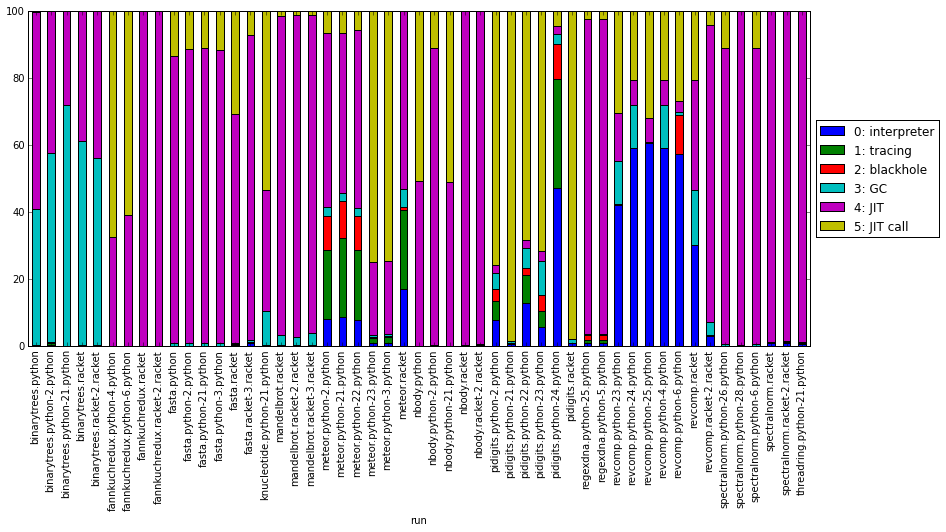

In [79]:
ax = cat_df.unstack().plot( kind="bar", stacked=True, y="num_inst_ratio", ylim=(0,100), figsize=(14,6) )
ax.legend( loc="center left", bbox_to_anchor=(1, 0.5) )

In [61]:
cat_df.unstack()

phase                                       \
category                           C      G      T      b        c      g   
run                                                                         
binarytrees.python             196.0  120.0  132.0  110.0    264.0  122.0   
binarytrees.python-2.python    196.0  120.0  132.0  110.0      NaN  122.0   
binarytrees.python-21.python   196.0  120.0  132.0  110.0    264.0  122.0   
binarytrees.racket             286.0  120.0  132.0  110.0      NaN  122.0   
binarytrees.racket-2.racket    286.0  120.0  132.0  110.0      NaN  122.0   
fannkuchredux.python-4.python  286.0  120.0  132.0  110.0   5893.0  122.0   
fannkuchredux.python-6.python  286.0    NaN  132.0  110.0   2158.0  122.0   
fannkuchredux.racket           286.0    NaN  132.0  110.0      NaN  122.0   
fannkuchredux.racket-2.racket  286.0    NaN  132.0  110.0      NaN  122.0   
fasta.python                   196.0  120.0  132.0  110.0   3169.0  122.0   
fasta.python-2.python          196.0  120.0  132.0  110.0   1426.0  122.0   
fasta.python-21.python         196.0  120.0  132.0  110.0   3003.0  122.0   
fasta.python-3.python          196.0  120.0  132.0  110.0   2173.0  122.0   
fasta.racket                   286.0  120.0  132.0  110.0   2173.0  122.0   
fasta.racket-3.racket          286.0    NaN  132.0  110.0   3169.0  122.0   
knucleotide.python-21.python   196.0  120.0  132.0  110.0   2754.0  122.0   
mandelbrot.racket              286.0  120.0  132.0  110.0   1509.0  122.0   
mandelbrot.racket-2.racket     286.0  120.0  132.0  110.0   1509.0  122.0   
mandelbrot.racket-3.racket     286.0  120.0  132.0  110.0   2007.0  122.0   
meteor.python                  572.0    NaN  264.0  220.0  32566.0  244.0   
meteor.python-2.python         286.0    NaN  132.0  110.0  16366.0  122.0   
meteor.python-21.python        286.0    NaN  132.0  110.0  17860.0  122.0   
meteor.python-22.python        286.0    NaN  132.0  110.0  16864.0  122.0   
meteor.python-23.python        286.0    NaN  132.0  110.0   7236.0  122.0   
meteor.python-3.python         286.0    NaN  132.0  110.0  13627.0  122.0   
meteor.racket                  286.0    NaN  132.0  110.0   1079.0  122.0   
nbody.python                   196.0    NaN  132.0  110.0    664.0  122.0   
nbody.python-2.python          196.0    NaN  132.0  110.0    498.0  122.0   
nbody.python-21.python         196.0    NaN  132.0  110.0    664.0  122.0   
nbody.racket                   196.0    NaN  132.0  110.0      NaN  122.0   
nbody.racket-2.racket          286.0    NaN  132.0  110.0      NaN  122.0   
pidigits.python-2.python       196.0  120.0  132.0  110.0  22342.0  122.0   
pidigits.python-21.python      196.0  120.0  132.0  110.0   4082.0  122.0   
pidigits.python-22.python      196.0  120.0  132.0  110.0  23836.0  122.0   
pidigits.python-23.python      196.0  120.0  132.0  110.0  28069.0  122.0   
pidigits.python-24.python      196.0    NaN  132.0  110.0  14872.0  122.0   
pidigits.racket                186.0  120.0  132.0  110.0  17196.0  122.0   
regexdna.python-25.python      196.0  120.0  132.0  110.0   6557.0  122.0   
regexdna.python-5.python       196.0  120.0  132.0  110.0   6557.0  122.0   
revcomp.python-23.python       196.0  120.0  132.0  110.0   2588.0  122.0   
revcomp.python-24.python       196.0  120.0  132.0  110.0   1841.0  122.0   
revcomp.python-25.python       196.0  120.0  132.0  110.0   1675.0  122.0   
revcomp.python-4.python        196.0  120.0  132.0  110.0   1841.0  122.0   
revcomp.python-6.python        196.0  120.0    NaN  110.0   1758.0  122.0   
revcomp.racket                 196.0  120.0  132.0  110.0   1426.0  122.0   
revcomp.racket-2.racket        286.0  120.0  132.0  110.0   1992.0  122.0   
spectralnorm.python-26.python  196.0  120.0  132.0  110.0     98.0  122.0   
spectralnorm.python-28.python  196.0    NaN  132.0  110.0      NaN  122.0   
spectralnorm.python-6.python   196.0  120.0  132.0  110.0     98.0  122.0   
spectralnorm.racket        

In [39]:
run_df

,type,phase,num_bb,num_inst,num_phase_chg,num_phase_chg_phony,addr,call_fun_name,run,category
0,c,0,64957,71469725754,608842493,608774426,0,NaN,binarytrees.python,i
1,p,86,7321474119,36301499095,304356571,0,0,NaN,binarytrees.python,j
2,p,122,3117495995,15008870369,16113,0,0,NaN,binarytrees.python,g
3,p,120,3279994271,13988001721,617,0,0,NaN,binarytrees.python,G
4,p,83,99029608,965538678,49514804,0,140684118016269,empty,binarytrees.python,j
5,p,83,99029608,965538678,49514804,0,140684118015496,empty,binarytrees.python,j
6,p,83,99029608,965538678,49514804,0,140684118007199,empty,binarytrees.python,j
7,p,83,99029608,965538678,49514804,0,140684118017069,empty,binarytrees.python,j
8,p,83,99029608,965538678,49514804,0,140684118007985,empty,binarytrees.python,j
9,p,83,99029608,965538678,49514804,0,140684118006469,empty,binarytrees.python,j
